|Branch	        |PPAC	                            |code
|:---           |       :---:                       |---:
|PPACF8[0][0]	|PPAC 1 Layer A X (mm)	            |x[0]
|PPACF8[0][1]	|PPAC 1 Layer A Y (mm)	            |y[0]
|PPACF8[0][2]	|PPAC 1 Layer A Z for X-plan (mm)	|$z_x$[0]
|PPACF8[0][3]	|PPAC 1 Layer A Z for Y-plan (mm)	|$z_y$[0]
|PPACF8[0][4]	|PPAC 1 Layer A Anode time (ns)	    |$t[0]$
|PPACF8[1][0]	|PPAC 1 Layer B X (mm)	            |$x[1]$
|PPACF8[1][1]	|PPAC 1 Layer B Y (mm)	            |$y[1]$
|PPACF8[1][2]	|PPAC 1 Layer B Z for X-plan (mm)	|$z_x[1]$
|PPACF8[1][3]	|PPAC 1 Layer B Z for Y-plan (mm)	|$z_y[1]$
|PPACF8[1][4]	|PPAC 1 Layer B Anode time (ns)     |$t[1]$
|PPACF8[2][0-4]	|PPAC 2 Layer A *	                |x[2],y[2],$z_x$[2],$z_y$[2]
|PPACF8[3][0-4]	|PPAC 2 Layer B *                   |$x[3]$,$y[3]$,$z_{x}[3]$,$z_{y}[3]$
|PPACF8[4][0-4]	|PPAC 3 *	                        |$x$[4],$y$[4],$z_x$[4],$z_y$[4]


# 判断思路

为检查能否输出赋值k，k初值为0，PPAC1A可以作为输出就给其加$2^0$,B就加$2^1$，PPAC2A就加$2^2$，PPAC2B就加$2^3$,PPAC3就加$2^4$，如此，就可以通过k值来判断是否可以读还能判断是哪个板子可读。如10001，就指PPAC3和PPAC1A可读。也就是说，k为0时，指没有板子可读，为$2^n$时，就指只有一个PPAC板上的值可读，为$2^{(2n+1)}+2^{(2n)}$时只在一个板子上可读

In [1]:
//TFile *ipf = new TFile("f8ppac001.root");  
//TTree *tree = (TTree*)  ipf->Get("tree"); 
//tree->MakeClass("f8ppac001"); 

In [2]:
//%jsroot on
//gROOT->ProcessLine(".L f8ppac001.C"); 
//gROOT->ProcessLine("f8ppac001 rt");  
//rt.Loop(); 

In [3]:
TFile *File = new TFile("tracking.root"); 
TTree *Data = (TTree*)File->Get("tree"); 

Double_t Fitxk, Fitxb, Fityk, Fityb, x[5], z_x[5],  y[5], z_y[5], ch[5], t[5]; 
Int_t must2Trig, beamTrig, k_x, k_y; 
Long64_t NEntry = Data -> GetEntries(); 

Data -> SetBranchAddress("z_x", &z_x); 
Data -> SetBranchAddress("x", &x); 
Data -> SetBranchAddress("z_y", &z_y); 
Data -> SetBranchAddress("y", &y); 
Data -> SetBranchAddress("Fitxk", &Fitxk); 
Data -> SetBranchAddress("Fitxb", &Fitxb); 
Data -> SetBranchAddress("Fityk", &Fityk); 
Data -> SetBranchAddress("Fityb", &Fityb); 
Data -> SetBranchAddress("must2Trig", &must2Trig); 
Data -> SetBranchAddress("beamTrig", &beamTrig); 
Data -> SetBranchAddress("k_x", &k_x); 
Data -> SetBranchAddress("k_x", &k_x); 
Data -> SetBranchAddress("t", &t); 

$$x + z = 0$$
$$x=k_{xz}+b_{x}$$
$$y=k_{yz}+b_y$$

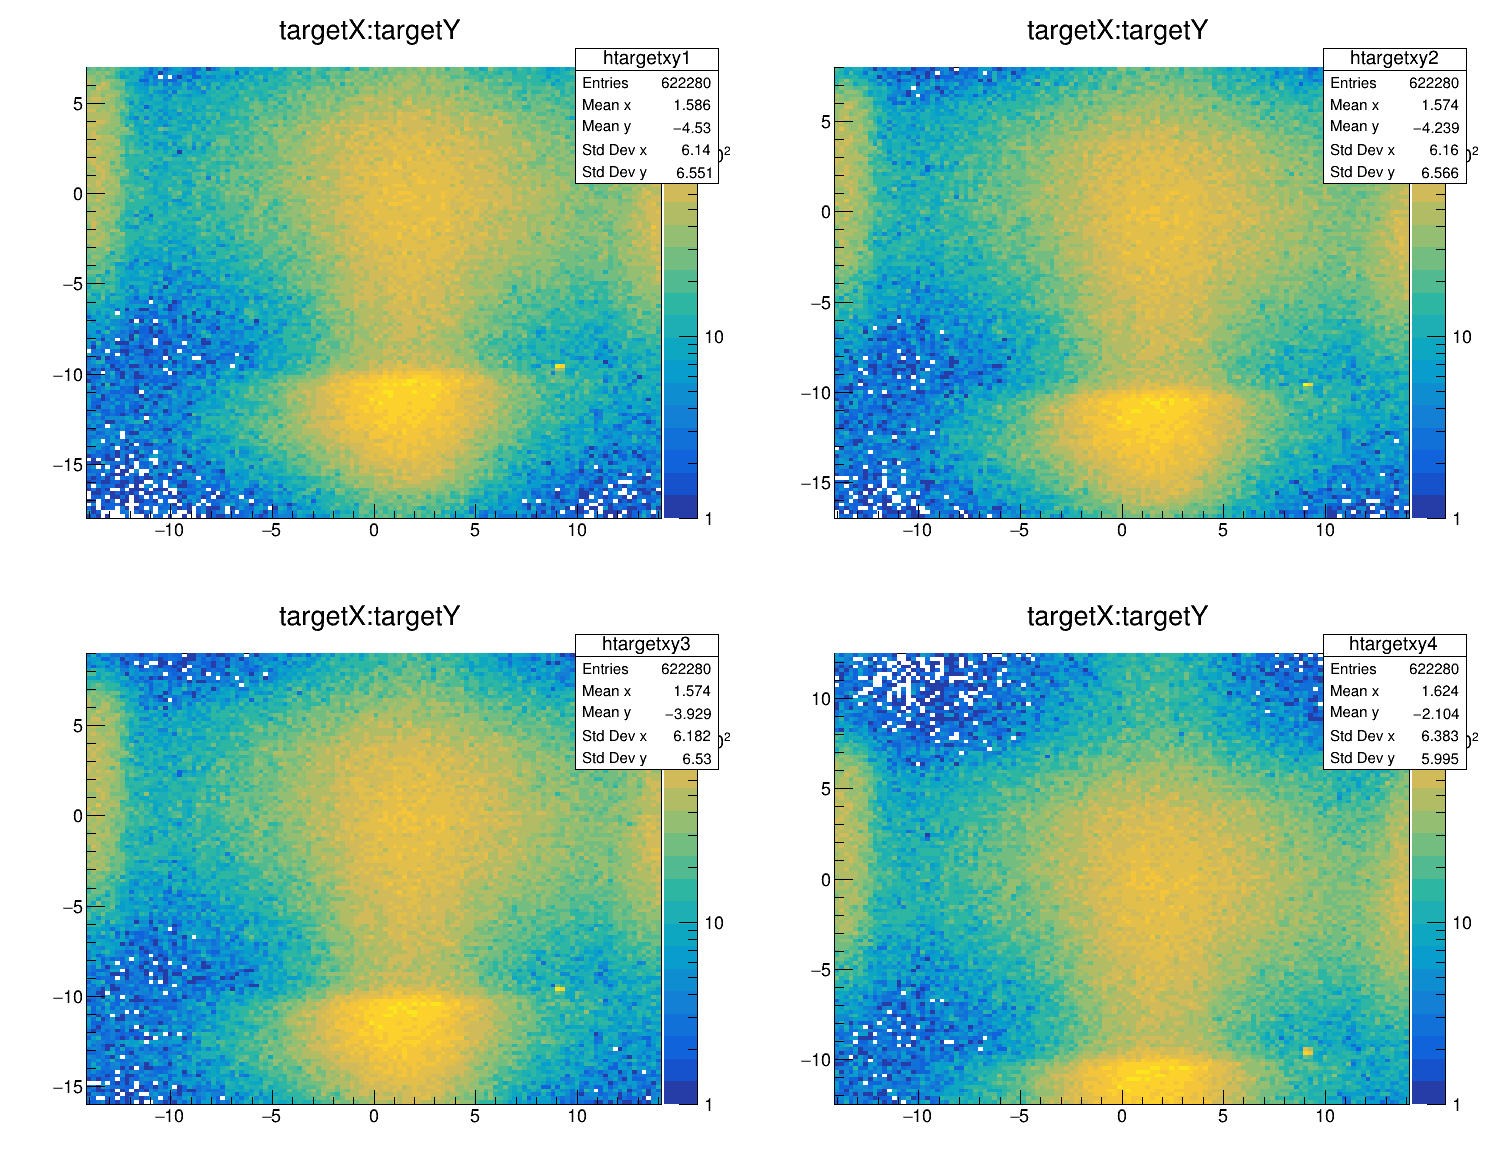

In [4]:
Double_t l = 20.0/TMath::Sqrt(2.0); 
TH2D *htargetxy1 = new TH2D("htargetxy1", "targetX:targetY", 120, -l, l, 120, -18, 7); 
TH2D *htargetxy2 = new TH2D("htargetxy2", "targetX:targetY", 120, -l, l, 120, -17, 8); 
TH2D *htargetxy3 = new TH2D("htargetxy3", "targetX:targetY", 120, -l, l, 120, -16, 9); 
TH2D *htargetxy4 = new TH2D("htargetxy4", "targetX:targetY", 120, -l, l, 120, -12.5, 12.5); 

for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if((1+Fitxk != 0) && (Fitxk != 999) && (Fityk != 999))   htargetxy2 -> Fill(Fitxb/(1+Fitxk), Fitxb*Fityk/(1+Fitxk)+Fityb); 
    if((1+Fitxk != 0) && (Fitxk != 999) && (Fityk != 999))   htargetxy1 -> Fill(Fitxb/(1+Fitxk), Fitxb*Fityk/(1+Fitxk)+Fityb); 
    if((1+Fitxk != 0) && (Fitxk != 999) && (Fityk != 999))   htargetxy4 -> Fill(Fitxb/(1+Fitxk), Fitxb*Fityk/(1+Fitxk)+Fityb); 
    if((1+Fitxk != 0) && (Fitxk != 999) && (Fityk != 999))   htargetxy3 -> Fill(Fitxb/(1+Fitxk), Fitxb*Fityk/(1+Fitxk)+Fityb); 
}

TCanvas *ctargetXY = new TCanvas("ctargetXY", "ctargetXY", 1500, 1200); 
ctargetXY -> Divide(2, 2); 

ctargetXY -> cd(1); 
htargetxy1 -> Draw("colz"); 
htargetxy1 -> SetMinimum(1); 
ctargetXY -> cd(1) -> SetLogz(); 
htargetxy1 -> SetMaximum(300); 

ctargetXY -> cd(2); 
ctargetXY -> cd(2) -> SetLogz(); 
htargetxy2 -> Draw("colz"); 
htargetxy2 -> SetMinimum(1); 
htargetxy2 -> SetMaximum(300); 

ctargetXY -> cd(3); 
ctargetXY -> cd(3) -> SetLogz(); 
htargetxy3 -> Draw("colz"); 
htargetxy3 -> SetMinimum(1); 
htargetxy3 -> SetMaximum(300); 

ctargetXY -> cd(4); 
ctargetXY -> cd(4) -> SetLogz(); 
htargetxy4 -> Draw("colz"); 
htargetxy4 -> SetMinimum(1); 
htargetxy4 -> SetMaximum(300);

ctargetXY -> Draw(); 


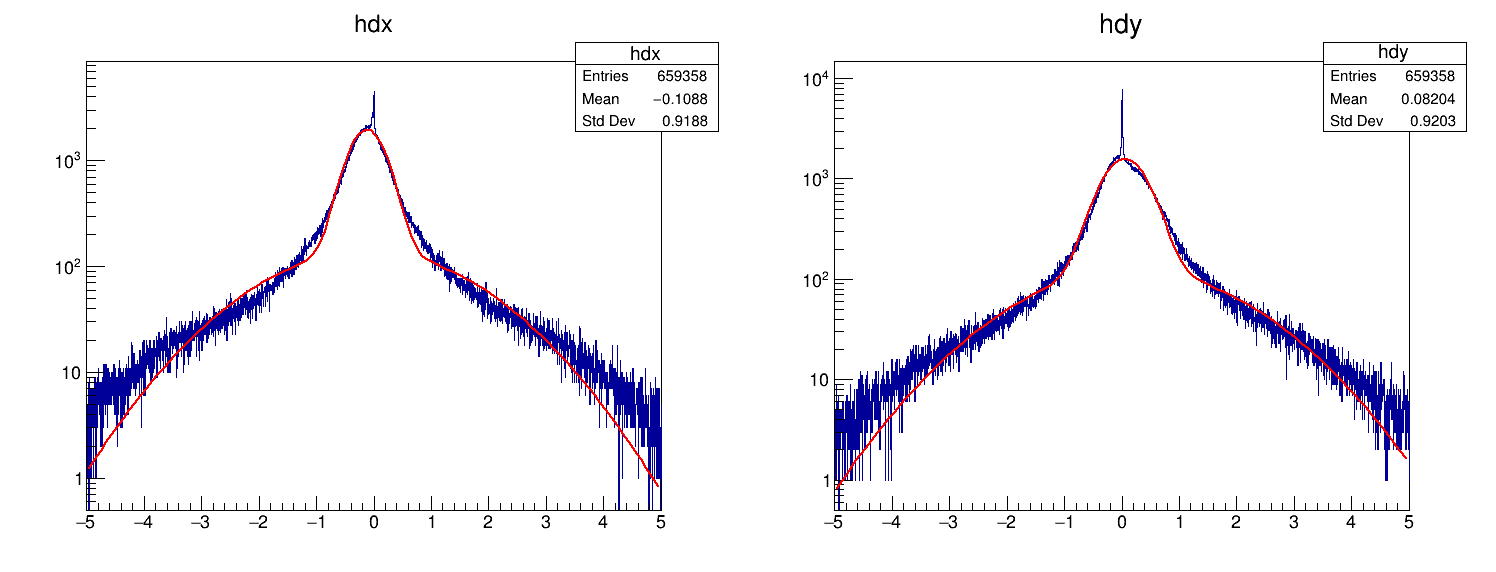

 FCN=7528.39 FROM MIGRAD    STATUS=CONVERGED      79 CALLS          80 TOTAL
                     EDM=1.93349e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.9 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.04700e+03   4.45608e+00  -3.32543e-03   4.92424e-05
   2  Mean        -1.02749e-01   6.27789e-04   3.67704e-06  -2.38066e-01
   3  Sigma        2.92357e-01   7.13779e-04  -3.57974e-06   2.47274e-01
0.292357
 FCN=19163.5 FROM MIGRAD    STATUS=CONVERGED     565 CALLS         566 TOTAL
                     EDM=6.66141e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.81539e+03   4.15640e+00   3.24780e-02   2.20693e-04
   2  p1          -1.13064e-01   5.45034e-04   1.05730e-05  -1.18469e+0

In [5]:
TH1D* hdX = new TH1D("hdx", "hdx", 3000, -5, 5); 
TH1D* hdY = new TH1D("hdy", "hdy", 3000, -5, 5); 

for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    hdX -> Fill(x[0] - Fitxk * z_x[0] - Fitxb); 
    hdY -> Fill(y[0] - Fityk * z_y[0] - Fityb); 
}

TF1 *FithdX1 = new TF1("FithdX1","gaus"); 
TF1 *FithdX  = new TF1("FithdX","gaus(0)+gaus(3)", -5, 5); 

hdX -> Fit("FithdX1", "NR", "", -0.5, 0.5); 
Double_t sigma = FithdX1 -> GetParameter(2); 
Double_t meanX = FithdX1 -> GetParameter(1); 

std::cout<<sigma<<std::endl; 
FithdX -> SetParameter(2,     sigma); 
FithdX -> SetParameter(5, 4 * sigma); 
FithdX -> SetParameter(1,     meanX); 
FithdX -> SetParameter(4,     meanX); 
hdX -> Fit("FithdX", "NR", "", -5, 5); 

TF1 *FithdY1 = new TF1("FithdY1","gaus"); 
TF1 *FithdY  = new TF1("FithdY","gaus(0)+gaus(3)", -5, 5); 

hdY -> Fit("FithdY1", "RN", "", -0.1, 0.9); 
Double_t sigmaY = FithdY1 -> GetParameter(2); 
Double_t meanY  = FithdY1 -> GetParameter(1); 

FithdY -> SetParameter(2,     sigmaY); 
FithdY -> SetParameter(1,     meanY); 
FithdY -> SetParameter(4,     meanY); 
FithdY -> SetParameter(5, 4 * sigmaY); 
hdY    -> Fit("FithdY", "RN", "", -4, 5); 

TCanvas *dXdY = new TCanvas("dXdY", "dXdY", 1500, 600); 
dXdY -> Divide(2, 1); 
dXdY -> cd(1) ->SetLogy(1); 
hdX -> Draw(); 
FithdX -> Draw("SAME"); 
dXdY -> cd(2) ->SetLogy(1); 
hdY -> Draw(); 
FithdY -> Draw("SAME"); 
dXdY -> Draw(); 

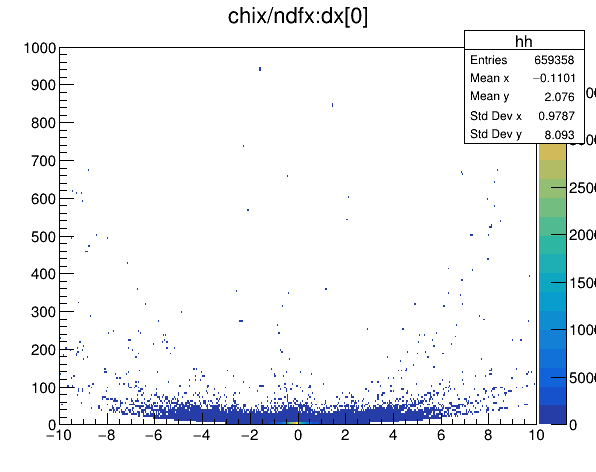

In [6]:
TCanvas *c1 = new TCanvas("c1", "c1", 600, 500); 
Data->Draw("chix/ndfx:dx[0]>>hh(400,-10,10,200,0,1000)","","colz"); 
c1->Draw();//从chi2/ndf图上可看出，部分事件的径迹拟合误差很大，这部分要在后续数据处理中去掉。

dy[0]差更大，以dy[0]为例

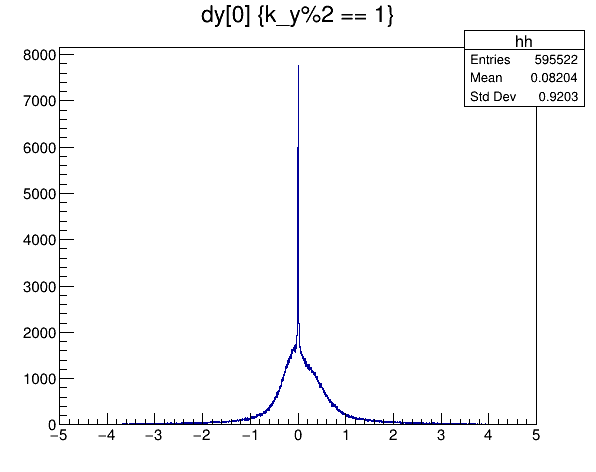

In [7]:
c1 -> Clear(); 
Data->Draw("dy[0]>>hh(3000,-5,5)","k_y%2 == 1"); 
c1->Draw(); 

如图所示包含y[0]的会有比较明显的尖峰。

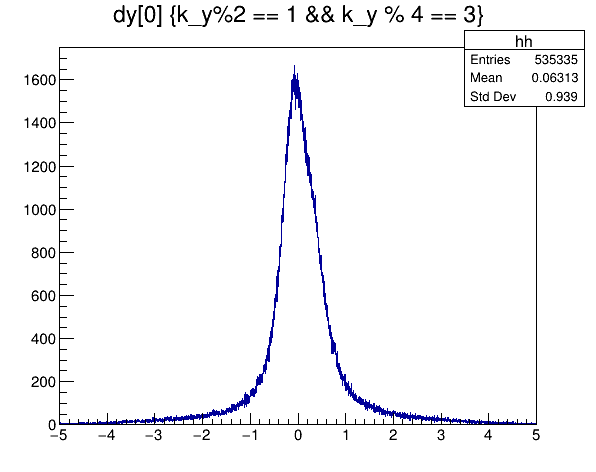

In [8]:
c1 -> Clear(); 
Data->Draw("dy[0]>>hh(3000,-5,5)","k_y%2 == 1 && k_y % 4 == 3"); 
c1->Draw(); //这样就无了

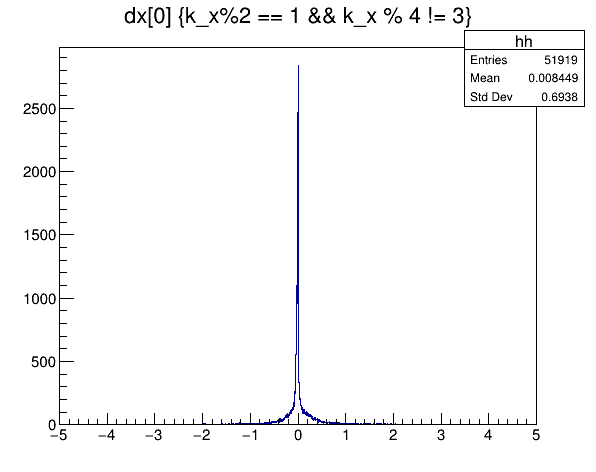

In [9]:
c1 -> Clear(); 
Data->Draw("dx[0]>>hh(3000,-5,5)","k_x%2 == 1 && k_x % 4 != 3"); 
c1->Draw(); 

结合上图，可知凸起在PPAC1A结合PPAC1B以外的板上，下面进行尝试

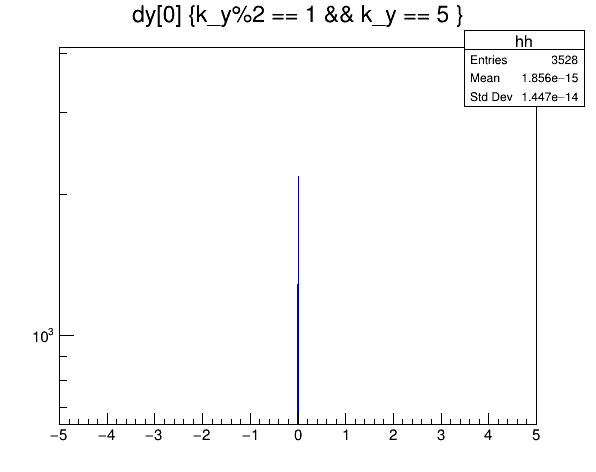

In [23]:
c1 -> Clear(); 
Data->Draw("dy[0]>>hh(3000,-5,5)","k_y%2 == 1 && k_y == 5 "); 
c1->Draw(); 

上图数值变小不大够，考虑还有结合其他板子

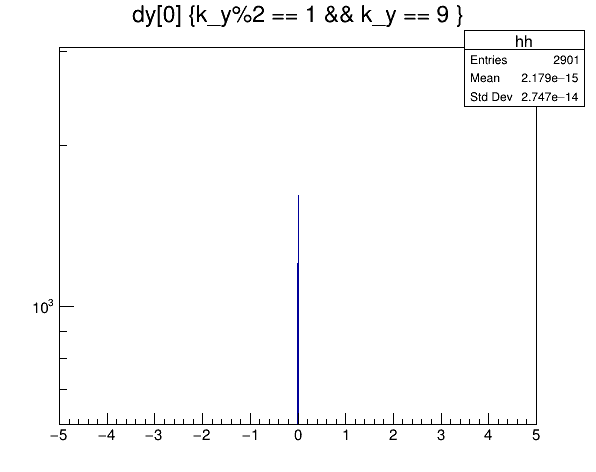

In [24]:
c1 -> Clear(); 
Data->Draw("dy[0]>>hh(3000,-5,5)","k_y%2 == 1 && k_y == 9 "); 
c1->Draw(); 

检验带PPAC3

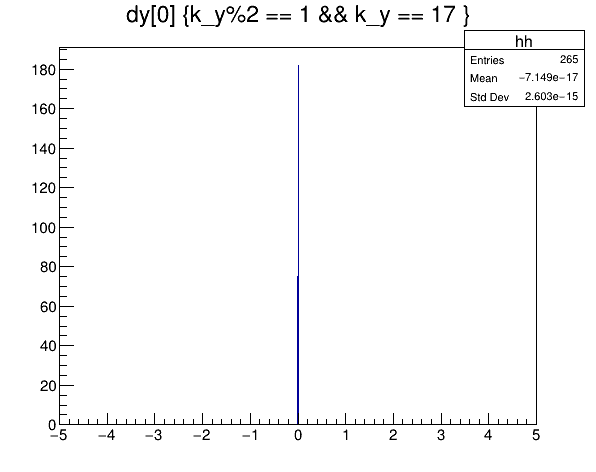

In [12]:
c1 -> Clear(); 
Data->Draw("dy[0]>>hh(3000,-5,5)","k_y%2 == 1 && k_y == 17 "); 
c1->Draw(); 

上面三种情况，加和恰好在6400左右。也就是说探知到了所有情况

In [13]:
Long64_t N = 0; 
for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if((1+Fitxk != 0)  && (Fitxk != 999) && (Fityk != 999) && (TMath::Abs(Fitxb/(1+Fitxk) < 20)) && (Fitxb*Fityk/(1+Fitxk)+Fityb > -17) && ((Fitxb*Fityk/(1+Fitxk)+Fityb < 8)))   N++; 
}
std::cout<<"总探测x-y效率"<<Double_t(N)/NEntry*100<<"%"<<std::endl; 

总探测x-y效率83.3803%


# 探测效率，最直接的方式肯定是阴极除阳极

In [14]:
Long64_t N = 0; 
for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if(t[0] > 0)   N++; 
}
std::cout<<"PPAC1A探测x-y效率"<<Double_t(N)/NEntry*100<<"%"<<std::endl; 

PPAC1A探测x-y效率98.7837%


In [15]:
Long64_t N = 0; 
for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if(t[4] > 0)   N++; 
}
std::cout<<"PPAC3探测x-y效率"<<Double_t(N)/NEntry*100<<"%"<<std::endl; 

PPAC3探测x-y效率55.2457%


# 探测效率，取$\epsilon = \frac{N_{target}}{N}$，$N_{target}$指打到靶上的粒子，N指总粒子数

In [16]:
Long64_t N = 0; 
for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if((t[0] > 0) && (1+Fitxk != 0)  && (Fitxk != 999) && (TMath::Abs(Fitxb/(1+Fitxk) < 20)) && (Fitxb*Fityk/(1+Fitxk)+Fityb > -17) && ((Fitxb*Fityk/(1+Fitxk)+Fityb < 8)))   N++; 
}
std::cout<<"PPAC1A探测x-y效率"<<Double_t(N)/NEntry*100<<"%"<<std::endl; 

PPAC1A探测x-y效率82.6907%


In [17]:
Long64_t N = 0; 
for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if((t[0] > 0) && (t[1] > 0) && (t[2] > 0) && (t[3] > 0) && (t[4] > 0) && (1+Fitxk != 0)  && (Fitxk != 999) && (TMath::Abs(Fitxb/(1+Fitxk) < 20)) && (Fitxb*Fityk/(1+Fitxk)+Fityb > -17) && ((Fitxb*Fityk/(1+Fitxk)+Fityb < 8)))   N++; 
}
std::cout<<"探测x-y总效率"<<Double_t(N)/NEntry*100<<"%"<<std::endl; 

探测x-y总效率44.8318%


In [18]:
Long64_t N = 0; 
for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if((t[4] > 0) && (1+Fitxk != 0)  && (Fitxk != 999) && (Fityk != 999) && (TMath::Abs(Fitxb/(1+Fitxk) < 20)) && (TMath::Abs(Fitxb/(1+Fitxk) < 20)) && (Fitxb*Fityk/(1+Fitxk)+Fityb > -17) && ((Fitxb*Fityk/(1+Fitxk)+Fityb < 8)))   N++; 
}
std::cout<<"PPAC3探测x-y效率"<<Double_t(N)/NEntry*100<<"%"<<std::endl; 

PPAC3探测x-y效率47.2165%


In [19]:
Long64_t N = 0; 
for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if((t[0] > 0) && (t[1] > 0) && (t[2] > 0) && (t[3] > 0) && (t[4] > 0) && (1+Fitxk != 0) && (Fitxk != 999) && (Fitxb != 999) && (TMath::Abs(Fitxb/(1+Fitxk) < 20)))   N++; 
}
std::cout<<"总探测x效率"<<Double_t(N)/NEntry*100<<"%"<<std::endl; 

N = 0; 
for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if((t[0] > 0) && (1+Fitxk != 0)  && (Fitxk != 999) && (Fitxb != 999))   N++; 
}
std::cout<<"PPAC1A探测x效率"<<Double_t(N)/NEntry*100<<"%"<<std::endl; 

N = 0; 
for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if((t[4] > 0) && (1+Fitxk != 0)  && (Fitxk != 999) && (Fitxb != 999))   N++; 
}
std::cout<<"PPAC3探测x效率"<<Double_t(N)/NEntry*100<<"%"<<std::endl; 

总探测x效率50.3796%
PPAC1A探测x效率95.5103%
PPAC3探测x效率54.4504%


In [20]:
Long64_t N = 0; 
for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if((t[0] > 0) && (t[1] > 0) && (t[2] > 0) && (t[3] > 0) && (t[4] > 0) && (1+Fitxk != 0) && (Fityk < 999) && (Fityb < 999) && (Fitxb*Fityk/(1+Fitxk)+Fityb > -17) && ((Fitxb*Fityk/(1+Fitxk)+Fityb < 8)))   N++; 
}
std::cout<<"总探测y效率"<<Double_t(N)/NEntry*100<<"%"<<std::endl; 
N = 0; 
for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if((t[0] > 0) && (1+Fitxk != 0)  && (Fityb != 999) && (Fityk != 999))   N++; 
}
std::cout<<"PPAC1A探测y效率"<<Double_t(N)/NEntry*100<<"%"<<std::endl; 

N = 0; 
for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if((t[4] > 0) && (Fityb != 999) && (Fityk != 999))   N++; 
}
std::cout<<N<<std::endl; 
std::cout<<"PPAC3探测y效率"<<Double_t(N)/NEntry*100<<"%"<<std::endl; 

总探测y效率46.278%
PPAC1A探测y效率96.8562%
359876
PPAC3探测y效率54.5798%


# 这样显然是偏低的，打到探测器上的粒子不是总粒子数，改为$\frac{N_{target}}{N}$，N为打到探测器上的粒子数，而且很明显必须使用同组探测器探测到的值，因为其他的值会有失真。

In [21]:
Long64_t N = 0; 
Long64_t Num = 0; 
for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if((1+Fitxk != 0)  && (Fityb != 999) && (Fityk != 999) && (Fitxb*Fityk/(1+Fitxk)+Fityb > -17) && ((Fitxb*Fityk/(1+Fitxk)+Fityb < 8))){
    Num++; 
    if((t[0] > 0) && (t[1] > 0) && (t[2] > 0) && (t[3] > 0) && (t[4] > 0))   N++; 
    }
}
std::cout<<"总探测y效率"<<Double_t(N)/Num*100<<"%"<<std::endl; 

N = 0; 
Num = 0; 
for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if((1+Fitxk != 0)  && (Fityb != 999) && (Fityk != 999) && (TMath::Abs(Fityk * z_y[0] + Fityb) < 150)){
    Num++; 
    if((t[0] > 0))   N++; 
    }
}
std::cout<<"PPAC1A探测y效率"<<Double_t(N)/NEntry*100<<"%"<<std::endl; 

N = 0; 
Num = 0; 
for(Long64_t j = 0; j < NEntry; j++){
    Data -> GetEntry(j); 
    if((1+Fitxk != 0)  && (Fityb != 999) && (Fityk != 999) && (TMath::Abs(Fityk * z_y[0] + Fityb) < 110)){
    Num++; 
    if((t[4] > 0))   N++; 
    }
}
std::cout<<"PPAC3探测y效率"<<Double_t(N)/NEntry*100<<"%"<<std::endl; 

总探测y效率53.0886%
PPAC1A探测y效率96.8562%
PPAC3探测y效率54.5798%


接下来求解分辨率，先解PPAC1A的分辨率

可想而知，误差为0的点不能选用求解分辨率，会造成分辨率失真。

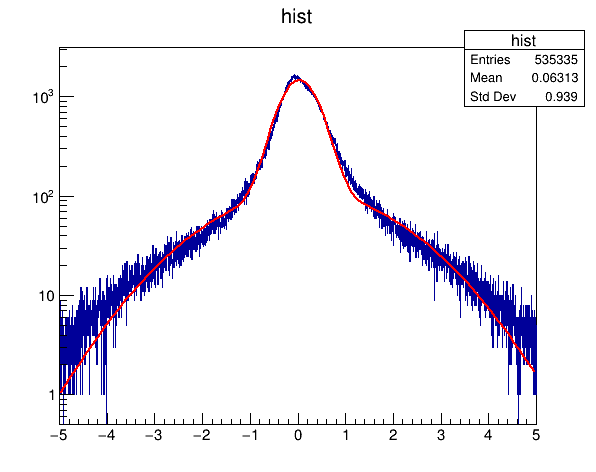

 FCN=71982.6 FROM MIGRAD    STATUS=CONVERGED      94 CALLS          95 TOTAL
                     EDM=2.79468e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.28671e+03   2.93823e+00  -1.79741e-03  -1.52480e-05
   2  Mean         5.19510e-02   7.03745e-04   3.09957e-09   2.23638e-03
   3  Sigma        4.68304e-01   8.12099e-04  -2.25546e-07  -1.14169e-01
 FCN=9141.52 FROM MIGRAD    STATUS=CONVERGED     543 CALLS         544 TOTAL
                     EDM=1.63758e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.1 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.35006e+03   3.13267e+00  -7.77945e-03   2.24231e-04
   2  p1           3.93691e-02   7.59272e-04   3.14094e-07  -1.62747e-01
   3  p

In [22]:
c1 -> Clear(); 
TH1D *hist = new TH1D("hist", "hist", 3000, -5, 5); 
Data->Draw("dy[0]>>hist","k_y % 4 == 3", "goff"); 
TF1 *f1 = new TF1("f1", "gaus", -5, 5); 
TF1 *f2 = new TF1("f2", "gaus(0)+gaus(3)", -5, 5); 

hist -> Fit("f1", "NR", "", -5, 5);
f2 -> SetParameter(1, f1 -> GetParameter(1)); 
f2 -> SetParameter(2, (f1 -> GetParameter(2))); 
f2 -> SetParameter(4, f1 -> GetParameter(1)); 
f2 -> SetParameter(5, 4 * (f1 -> GetParameter(2))); 

hist -> Fit("f2", "NR", ""); 
hist ->Draw(); 
f2 -> Draw("SAME"); 
c1 -> SetLogy(1); 
c1->Draw(); 

得到标准差也就是分辨率0.3759